# NN 2022

## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 15.03.2022
- remaining points: last lab session before or on Tuesday, 22.03.2022

**Points:** Aim to get 8 out of 12 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).
Make sure you know all the questions and asnwers, and that the notebook contains results; bfore presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with suchr calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (thet they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

# Solutions and starter code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

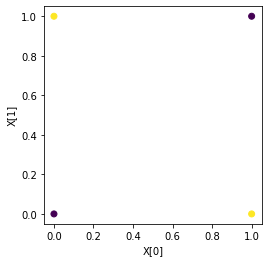

In [2]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

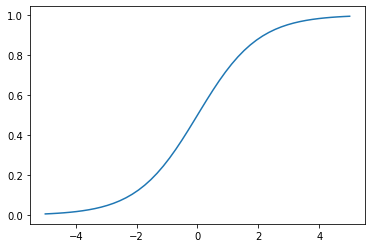

In [4]:
t = np.linspace(-5, 5)
plt.plot(t, sigmoid(t))
plt.show()

In [5]:
class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = np.dot(X, self.W1.T) + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # print(O1)
        # Inputs to neuron in the second layer
        A2 = np.dot(O1, self.W2.T) + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -np.sum((1 - Y) * np.log(1 - O2) + Y * np.log(O2)) # TODO cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation/
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = np.dot(A2_grad.T, O1)
            O1_grad = np.dot(A2_grad, self.W2)
            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = np.dot(A1_grad.T, X)

        return O2, loss

In [6]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=np.float64)
net.W1 = 10 * np.array([[1, -1], [-1, 1]])
net.b1 = -5 * np.array([1, 1])
net.W2 = 10 * np.array([[1, 1]])
net.b2 = 5 * np.array([-1])

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large

predictions, loss = net.forward(X, Y)#, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.007644135828260396
XORnet([0. 1.]) = 0.9928472118111036
XORnet([1. 0.]) = 0.9928472118111036
XORnet([1. 1.]) = 0.007644135828260396


## Problem 2

In [7]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape, f"{param_name} size doesn't match the gradient shape"

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [8]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [9]:
net = SmallNet(2, 10, dtype=np.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param[:] - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.7963235472814381
after 5000 steps 	loss=0.033322186521434274
after 10000 steps 	loss=0.011005403680906517
after 15000 steps 	loss=0.0062703534349069605
after 20000 steps 	loss=0.0042910466885084835
after 25000 steps 	loss=0.0032218959906317804
after 30000 steps 	loss=0.002558949362098815
after 35000 steps 	loss=0.0021106032189827416
after 40000 steps 	loss=0.001788693872654549
after 45000 steps 	loss=0.0015472111007791018
after 50000 steps 	loss=0.0013598859658445366
after 55000 steps 	loss=0.0012106720820751306
after 60000 steps 	loss=0.0010892363848784012
after 65000 steps 	loss=0.000988636677317215
after 70000 steps 	loss=0.0009040434783055841
after 75000 steps 	loss=0.0008319976122181747
after 80000 steps 	loss=0.0007699592221620443
after 85000 steps 	loss=0.000716023246513142
after 90000 steps 	loss=0.0006687340029935135
after 95000 steps 	loss=0.0006269609172573651


In [10]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.0003580865070048508
XORnet([0. 1.]) = 0.9994236549835024
XORnet([1. 0.]) = 0.9993779237235279
XORnet([1. 1.]) = 0.000801999218353014


In [11]:
from itertools import repeat, product

In [12]:
X3 = np.array(list(product(*repeat([0, 1], 3))))
Y3 = np.logical_xor.reduce(X3, axis=1, keepdims=True).astype(float)
X3, Y3

(array([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1]]),
 array([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.]]))

In [54]:
np.log10(101) == np.log10(101).round()

False

In [53]:
np.log10(101).round()

2.0

In [55]:
alpha = 0.1  # set a learning rate
n_repeats = 10
results = []

for hidden_dim in [2, 3, 5, 10, 20]:
    for _ in range(n_repeats):
        net = SmallNet(3, hidden_dim, dtype=np.float64)
        for i in range(1, 100001):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                param[:] = param[:] - alpha * getattr(net, param_name + "_grad")
            
            if (np.log10(i) == np.log10(i).round()):
                results.append(
                    {"epochs": i, "accuracy": (net.forward(X3)[0].round() == Y3).mean(), "loss": loss, "hidden_dim": hidden_dim}
                )

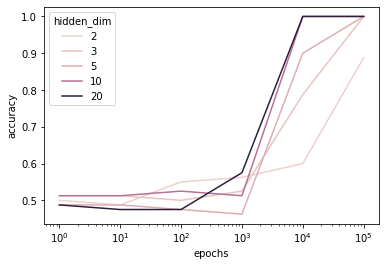

In [56]:
sns.lineplot(x="epochs", y="accuracy", hue="hidden_dim", data=pd.DataFrame(results).groupby(["hidden_dim", "epochs"]).mean()["accuracy"].reset_index())
plt.xscale("log")

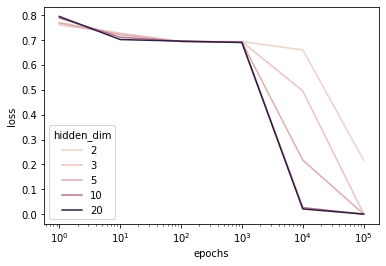

In [57]:
sns.lineplot(x="epochs", y="loss", hue="hidden_dim", data=pd.DataFrame(results).groupby(["hidden_dim", "epochs"]).mean()["loss"].reset_index())
plt.xscale("log")

## Problem 4


In [60]:
class ReLUNet(SmallNet):
    def forward(self, X, Y=None, do_backward=False):
        # Input to neurons in 1st layer
        A1 = np.dot(X, self.W1.T) + self.b1
        # Outputs after the ReLU non-linearity
        O1 = np.fmax(0, A1)
        # Inputs to neuron in the second layer
        A2 = np.dot(O1, self.W2.T) + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -np.sum((1 - Y) * np.log(1 - O2) + Y * np.log(O2)) # TODO cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = np.dot(A2_grad.T, O1)
            O1_grad = np.dot(A2_grad, self.W2)
            A1_grad = O1_grad * np.where(O1 == 0, 0, 1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = np.dot(A1_grad.T, X)

        return O2, loss

In [77]:
net = ReLUNet(3, 10)

alpha = 0.01  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param[:] - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.7361145519393121
after 5000 steps 	loss=0.5553701298489833
after 10000 steps 	loss=0.38736705463269394
after 15000 steps 	loss=0.1515391389085064
after 20000 steps 	loss=0.06254608401948614
after 25000 steps 	loss=0.03338646154022652
after 30000 steps 	loss=0.021336251156697975
after 35000 steps 	loss=0.015183260813445563
after 40000 steps 	loss=0.011560053458949032
after 45000 steps 	loss=0.009242154764854656
after 50000 steps 	loss=0.007640211105429329
after 55000 steps 	loss=0.0064709258736653005
after 60000 steps 	loss=0.005586773521455856
after 65000 steps 	loss=0.004896887485151577
after 70000 steps 	loss=0.0043464060093732805
after 75000 steps 	loss=0.0038979663445852107
after 80000 steps 	loss=0.0035265935592791284
after 85000 steps 	loss=0.003214436176279916
after 90000 steps 	loss=0.0029489621119440515
after 95000 steps 	loss=0.002720848055011697


In [78]:
print(f"accuracy: {(net.forward(X3)[0].round() == Y3).mean()}")

accuracy: 1.0


## Problem 5

In [81]:
class DeepNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden[0], in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden[0],), dtype=dtype)
        self.W2 = np.zeros((num_hidden[1], num_hidden[0]), dtype=dtype)
        self.b2 = np.zeros((num_hidden[1],), dtype=dtype)
        self.W3 = np.zeros((1, num_hidden[1]), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)
        self.W3 = np.random.normal(0, 0.5, self.W3.shape)
        self.b3 = np.random.normal(0, 0.5, self.b3.shape)

    def forward(self, X, Y=None, do_backward=False):
        # Input to neurons in 1st layer
        A1 = np.dot(X, self.W1.T) + self.b1
        O1 = sigmoid(A1)
        
        A2 = np.dot(O1, self.W2.T) + self.b2
        O2 = sigmoid(A2)

        A3 = np.dot(O2, self.W3.T) + self.b3
        O3 = sigmoid(A3)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -np.sum((1 - Y) * np.log(1 - O3) + Y * np.log(O3)) # TODO cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A3_grad = (O3 - Y) / X.shape[0]
            self.b3_grad = A3_grad.sum(0)
            self.W3_grad = np.dot(A3_grad.T, O2)

            O2_grad = np.dot(A3_grad, self.W3)
            A2_grad = O2_grad * O2 * (1 - O2)
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = np.dot(A2_grad.T, O1)

            O1_grad = np.dot(A2_grad, self.W2)
            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = np.dot(A1_grad.T, X)

        return O3, loss

In [89]:
net = DeepNet(3, [2, 2], dtype=np.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param[:] - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.8008456631278243
after 5000 steps 	loss=0.6931352997848874
after 10000 steps 	loss=0.693121623008466
after 15000 steps 	loss=0.6930991263056884
after 20000 steps 	loss=0.6930515217312132
after 25000 steps 	loss=0.6929068774459468
after 30000 steps 	loss=0.6918888643011369
after 35000 steps 	loss=0.6081977770031318
after 40000 steps 	loss=0.06641644967084001
after 45000 steps 	loss=0.01426677280956595
after 50000 steps 	loss=0.007138858892015345
after 55000 steps 	loss=0.004600775090662692
after 60000 steps 	loss=0.0033404723992621877
after 65000 steps 	loss=0.0025985769292876286
after 70000 steps 	loss=0.0021141274149681154
after 75000 steps 	loss=0.0017748917525165046
after 80000 steps 	loss=0.001525091102102796
after 85000 steps 	loss=0.001334038404760391
after 90000 steps 	loss=0.0011835262591507038
after 95000 steps 	loss=0.0010621014726378516


In [90]:
print(f"accuracy: {(net.forward(X3)[0].round() == Y3).mean()}")

accuracy: 1.0


## Problem 6

In [178]:
from typing import List

class Net:
    def __init__(self, in_features, num_hidden: List[int], dtype=np.float32):
        # First layer
        self.W = [np.zeros((num_hidden[0], in_features), dtype=dtype)]
        self.b = [np.zeros((num_hidden[0],), dtype=dtype)]

        # Add other layers
        for i in range(1, len(num_hidden)):
            self.W.append(np.zeros((num_hidden[i], num_hidden[i - 1]), dtype=dtype))
            self.b.append(np.zeros((num_hidden[i], ), dtype=dtype))

        # Last layer
        self.W.append(np.zeros((1, num_hidden[-1]), dtype=dtype))
        self.b.append(np.zeros((1, ), dtype=dtype))

        self.init_params()

    def init_params(self):
        for W, b in zip(self.W, self.b):
            W[:] = np.random.normal(0, 0.5, W.shape)
            b[:] = np.random.normal(0, 0.5, b.shape)

    def forward(self, X, Y=None, do_backward=False):
        # Input to neurons in 1st layer
        A = [np.dot(X, self.W[0].T) + self.b[0]]
        O = [sigmoid(A[0])]

        for W, b in zip(self.W[1:], self.b[1:]):
            A.append(np.dot(O[-1], W.T) + b)
            O.append(sigmoid(A[-1]))

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -np.sum((1 - Y) * np.log(1 - O[-1]) + Y * np.log(O[-1]))
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A_grad = [(O[-1] - Y) / X.shape[0]]
            self.b_grad = []
            self.W_grad = []

            for idx in range(len(self.W) - 1):
                self.b_grad.append(A_grad[idx].sum(0))
                self.W_grad.append(np.dot(A_grad[idx].T, O[-(idx + 2)]))
                O_grad = np.dot(A_grad[idx], self.W[-(idx + 1)])
                A_grad.append(O_grad * O[-(idx + 2)] * (1 - O[-(idx + 2)]))

            self.b_grad.append(A_grad[-1].sum(0))
            self.W_grad.append(np.dot(A_grad[-1].T, X))

            self.b_grad = self.b_grad[::-1]
            self.W_grad = self.W_grad[::-1]
        return O[-1], loss

    def backward(self, alpha: float = 0.1):
        for W, W_grad in zip(self.W, self.W_grad):
            W[:] = W[:] - alpha * W_grad

        for b, b_grad in zip(self.b, self.b_grad):
            b[:] = b[:] - alpha * b_grad

In [206]:
def ReLU(x):
    return np.fmax(0, x)

In [211]:
from typing import List, Union

class Net:
    def __init__(self, in_features, num_hidden: Union[List[int], int], dtype=np.float32, activation="sigmoid"):
        if isinstance(num_hidden, int):
            num_hidden = [num_hidden]

        self.activation = activation.lower()

        # First layer
        self.W = [np.zeros((num_hidden[0], in_features), dtype=dtype)]
        self.b = [np.zeros((num_hidden[0],), dtype=dtype)]

        # Add other layers
        for i in range(1, len(num_hidden)):
            self.W.append(np.zeros((num_hidden[i], num_hidden[i - 1]), dtype=dtype))
            self.b.append(np.zeros((num_hidden[i], ), dtype=dtype))

        # Last layer
        self.W.append(np.zeros((1, num_hidden[-1]), dtype=dtype))
        self.b.append(np.zeros((1, ), dtype=dtype))

        self.init_params()

    def init_params(self):
        for W, b in zip(self.W, self.b):
            W[:] = np.random.normal(0, 0.5, W.shape)
            b[:] = np.random.normal(0, 0.5, b.shape)

    def forward(self, X, Y=None, do_backward=False):
        # Input to neurons in 1st layer
        A = [np.dot(X, self.W[0].T) + self.b[0]]
        if self.activation == "sigmoid":
            O = [sigmoid(A[0])]
        elif self.activation == "relu":
            O = [ReLU(A[0])]
        else:
            raise ValueError("activation not known.")

        for W, b in zip(self.W[1:-1], self.b[1:-1]):
            A.append(np.dot(O[-1], W.T) + b)
            if self.activation == "sigmoid":
                O.append(sigmoid(A[-1]))
            elif self.activation == "relu":
                O.append(ReLU(A[-1]))
            else:
                raise ValueError("activation not known.")
            
        A.append(np.dot(O[-1], self.W[-1].T) + self.b[-1])
        O.append(sigmoid(A[-1]))

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -np.sum((1 - Y) * np.log(1 - O[-1]) + Y * np.log(O[-1]))
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A_grad = [(O[-1] - Y) / X.shape[0]]
            self.b_grad = []
            self.W_grad = []

            for idx in range(len(self.W) - 1):
                self.b_grad.append(A_grad[idx].sum(0))
                self.W_grad.append(np.dot(A_grad[idx].T, O[-(idx + 2)]))
                O_grad = np.dot(A_grad[idx], self.W[-(idx + 1)])
                if self.activation == "sigmoid":
                    A_grad.append(O_grad * O[-(idx + 2)] * (1 - O[-(idx + 2)]))
                elif self.activation == "relu":
                    A_grad.append(O_grad * np.where(O[-(idx + 2)] == 0, 0, 1))
                else:
                    raise ValueError("activation not known.")

            self.b_grad.append(A_grad[-1].sum(0))
            self.W_grad.append(np.dot(A_grad[-1].T, X))

            self.b_grad = self.b_grad[::-1]
            self.W_grad = self.W_grad[::-1]
        return O[-1], loss

    def backward(self, alpha: float = 0.1):
        for W, W_grad in zip(self.W, self.W_grad):
            W[:] = W[:] - alpha * W_grad

        for b, b_grad in zip(self.b, self.b_grad):
            b[:] = b[:] - alpha * b_grad

In [212]:
net = Net(3, 2 * [10], np.float64)
for i in range(100000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 5000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=7.142241e-01 	accuracy=0.5
after   5000 steps 	loss=6.908583e-01 	accuracy=0.75
after  10000 steps 	loss=2.216814e-02 	accuracy=1.0
after  15000 steps 	loss=3.333740e-03 	accuracy=1.0
after  20000 steps 	loss=1.653200e-03 	accuracy=1.0
after  25000 steps 	loss=1.072709e-03 	accuracy=1.0
after  30000 steps 	loss=7.849885e-04 	accuracy=1.0
after  35000 steps 	loss=6.149802e-04 	accuracy=1.0
after  40000 steps 	loss=5.034118e-04 	accuracy=1.0
after  45000 steps 	loss=4.248899e-04 	accuracy=1.0
after  50000 steps 	loss=3.667919e-04 	accuracy=1.0
after  55000 steps 	loss=3.221603e-04 	accuracy=1.0
after  60000 steps 	loss=2.868562e-04 	accuracy=1.0
after  65000 steps 	loss=2.582686e-04 	accuracy=1.0
after  70000 steps 	loss=2.346714e-04 	accuracy=1.0
after  75000 steps 	loss=2.148795e-04 	accuracy=1.0
after  80000 steps 	loss=1.980530e-04 	accuracy=1.0
after  85000 steps 	loss=1.835805e-04 	accuracy=1.0
after  90000 steps 	loss=1.710068e-04 	accuracy=1.0
after  9500

In [213]:
net = Net(3, 2 * [10], np.float64, "relu")
for i in range(100000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 5000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=7.618406e-01 	accuracy=0.5
after   5000 steps 	loss=5.227723e-04 	accuracy=1.0
after  10000 steps 	loss=2.110818e-04 	accuracy=1.0
after  15000 steps 	loss=1.268178e-04 	accuracy=1.0
after  20000 steps 	loss=8.893118e-05 	accuracy=1.0
after  25000 steps 	loss=6.470795e-05 	accuracy=1.0
after  30000 steps 	loss=5.053944e-05 	accuracy=1.0
after  35000 steps 	loss=4.136753e-05 	accuracy=1.0
after  40000 steps 	loss=3.492309e-05 	accuracy=1.0
after  45000 steps 	loss=3.014629e-05 	accuracy=1.0
after  50000 steps 	loss=2.647058e-05 	accuracy=1.0
after  55000 steps 	loss=2.355596e-05 	accuracy=1.0
after  60000 steps 	loss=2.119411e-05 	accuracy=1.0
after  65000 steps 	loss=1.924069e-05 	accuracy=1.0
after  70000 steps 	loss=1.760132e-05 	accuracy=1.0
after  75000 steps 	loss=1.620738e-05 	accuracy=1.0
after  80000 steps 	loss=1.500689e-05 	accuracy=1.0
after  85000 steps 	loss=1.396399e-05 	accuracy=1.0
after  90000 steps 	loss=1.304957e-05 	accuracy=1.0
after  95000

In [216]:
net = Net(3, 5 * [8], np.float64, "relu")
for i in range(100000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 5000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=7.170589e-01 	accuracy=0.375
after   5000 steps 	loss=7.769157e-05 	accuracy=1.0
after  10000 steps 	loss=3.294207e-05 	accuracy=1.0
after  15000 steps 	loss=2.020856e-05 	accuracy=1.0
after  20000 steps 	loss=1.434533e-05 	accuracy=1.0
after  25000 steps 	loss=1.101885e-05 	accuracy=1.0
after  30000 steps 	loss=8.895240e-06 	accuracy=1.0
after  35000 steps 	loss=7.431320e-06 	accuracy=1.0
after  40000 steps 	loss=6.362035e-06 	accuracy=1.0
after  45000 steps 	loss=5.550301e-06 	accuracy=1.0
after  50000 steps 	loss=4.913614e-06 	accuracy=1.0
after  55000 steps 	loss=4.401567e-06 	accuracy=1.0
after  60000 steps 	loss=3.981560e-06 	accuracy=1.0
after  65000 steps 	loss=3.631174e-06 	accuracy=1.0
after  70000 steps 	loss=3.334770e-06 	accuracy=1.0
after  75000 steps 	loss=3.080794e-06 	accuracy=1.0
after  80000 steps 	loss=2.861111e-06 	accuracy=1.0
after  85000 steps 	loss=2.669232e-06 	accuracy=1.0
after  90000 steps 	loss=2.499982e-06 	accuracy=1.0
after  950

In [217]:
net = Net(3, 7 * [8], np.float64, "relu")
for i in range(100000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 5000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=7.144741e-01 	accuracy=0.5
after   5000 steps 	loss=1.676167e-05 	accuracy=1.0
after  10000 steps 	loss=7.225811e-06 	accuracy=1.0
after  15000 steps 	loss=4.457482e-06 	accuracy=1.0
after  20000 steps 	loss=3.173394e-06 	accuracy=1.0
after  25000 steps 	loss=2.441804e-06 	accuracy=1.0
after  30000 steps 	loss=1.977088e-06 	accuracy=1.0
after  35000 steps 	loss=1.665863e-06 	accuracy=1.0
after  40000 steps 	loss=1.437857e-06 	accuracy=1.0
after  45000 steps 	loss=1.262153e-06 	accuracy=1.0
after  50000 steps 	loss=1.122875e-06 	accuracy=1.0
after  55000 steps 	loss=1.009896e-06 	accuracy=1.0
after  60000 steps 	loss=9.168572e-07 	accuracy=1.0
after  65000 steps 	loss=8.387609e-07 	accuracy=1.0
after  70000 steps 	loss=7.722944e-07 	accuracy=1.0
after  75000 steps 	loss=7.150736e-07 	accuracy=1.0
after  80000 steps 	loss=6.653243e-07 	accuracy=1.0
after  85000 steps 	loss=6.217093e-07 	accuracy=1.0
after  90000 steps 	loss=5.831743e-07 	accuracy=1.0
after  95000

In [218]:
net = Net(3, 10 * [8], np.float64, "relu")
for i in range(100000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 5000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=7.480972e-01 	accuracy=0.5
after   5000 steps 	loss=8.599217e-04 	accuracy=1.0
after  10000 steps 	loss=2.250264e-04 	accuracy=1.0
after  15000 steps 	loss=1.104276e-04 	accuracy=1.0
after  20000 steps 	loss=6.864752e-05 	accuracy=1.0
after  25000 steps 	loss=4.816838e-05 	accuracy=1.0
after  30000 steps 	loss=3.633904e-05 	accuracy=1.0
after  35000 steps 	loss=2.878966e-05 	accuracy=1.0
after  40000 steps 	loss=2.360726e-05 	accuracy=1.0
after  45000 steps 	loss=1.986505e-05 	accuracy=1.0
after  50000 steps 	loss=1.705091e-05 	accuracy=1.0
after  55000 steps 	loss=1.487380e-05 	accuracy=1.0
after  60000 steps 	loss=1.314251e-05 	accuracy=1.0
after  65000 steps 	loss=1.174061e-05 	accuracy=1.0
after  70000 steps 	loss=1.058173e-05 	accuracy=1.0
after  75000 steps 	loss=9.612521e-06 	accuracy=1.0
after  80000 steps 	loss=8.790846e-06 	accuracy=1.0
after  85000 steps 	loss=8.087040e-06 	accuracy=1.0
after  90000 steps 	loss=7.477914e-06 	accuracy=1.0
after  95000

In [221]:
net = Net(3, 12 * [8], np.float64, "relu")
for i in range(30000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 2000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=7.002463e-01 	accuracy=0.5
after   2000 steps 	loss=3.127763e-01 	accuracy=0.875
after   4000 steps 	loss=3.127597e-01 	accuracy=0.875
after   6000 steps 	loss=3.127563e-01 	accuracy=0.875
after   8000 steps 	loss=3.127548e-01 	accuracy=0.875
after  10000 steps 	loss=3.127540e-01 	accuracy=0.875
after  12000 steps 	loss=3.127535e-01 	accuracy=0.875
after  14000 steps 	loss=3.127532e-01 	accuracy=0.875
after  16000 steps 	loss=3.127530e-01 	accuracy=0.875
after  18000 steps 	loss=3.127528e-01 	accuracy=0.875
after  20000 steps 	loss=3.127526e-01 	accuracy=0.875
after  22000 steps 	loss=3.127525e-01 	accuracy=0.875
after  24000 steps 	loss=3.127524e-01 	accuracy=0.875
after  26000 steps 	loss=3.127531e-01 	accuracy=0.875
after  28000 steps 	loss=3.127528e-01 	accuracy=0.875


In [ ]:
net = Net(3, 7 * [8], np.float64, "relu")
for i in range(100000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 5000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=7.144741e-01 	accuracy=0.5
after   5000 steps 	loss=1.676167e-05 	accuracy=1.0
after  10000 steps 	loss=7.225811e-06 	accuracy=1.0
after  15000 steps 	loss=4.457482e-06 	accuracy=1.0
after  20000 steps 	loss=3.173394e-06 	accuracy=1.0
after  25000 steps 	loss=2.441804e-06 	accuracy=1.0
after  30000 steps 	loss=1.977088e-06 	accuracy=1.0
after  35000 steps 	loss=1.665863e-06 	accuracy=1.0
after  40000 steps 	loss=1.437857e-06 	accuracy=1.0
after  45000 steps 	loss=1.262153e-06 	accuracy=1.0
after  50000 steps 	loss=1.122875e-06 	accuracy=1.0
after  55000 steps 	loss=1.009896e-06 	accuracy=1.0
after  60000 steps 	loss=9.168572e-07 	accuracy=1.0
after  65000 steps 	loss=8.387609e-07 	accuracy=1.0
after  70000 steps 	loss=7.722944e-07 	accuracy=1.0
after  75000 steps 	loss=7.150736e-07 	accuracy=1.0
after  80000 steps 	loss=6.653243e-07 	accuracy=1.0
after  85000 steps 	loss=6.217093e-07 	accuracy=1.0
after  90000 steps 	loss=5.831743e-07 	accuracy=1.0
after  95000

In [222]:
net = Net(3, 12 * [8], np.float64, "sigmoid")
for i in range(30000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 2000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=9.011177e-01 	accuracy=0.5
after   2000 steps 	loss=6.931472e-01 	accuracy=0.625
after   4000 steps 	loss=6.931472e-01 	accuracy=0.625
after   6000 steps 	loss=6.931472e-01 	accuracy=0.625
after   8000 steps 	loss=6.931472e-01 	accuracy=0.625
after  10000 steps 	loss=6.931472e-01 	accuracy=0.625
after  12000 steps 	loss=6.931472e-01 	accuracy=0.625
after  14000 steps 	loss=6.931472e-01 	accuracy=0.625
after  16000 steps 	loss=6.931472e-01 	accuracy=0.625
after  18000 steps 	loss=6.931472e-01 	accuracy=0.625
after  20000 steps 	loss=6.931472e-01 	accuracy=0.625
after  22000 steps 	loss=6.931472e-01 	accuracy=0.625
after  24000 steps 	loss=6.931472e-01 	accuracy=0.625
after  26000 steps 	loss=6.931472e-01 	accuracy=0.625
after  28000 steps 	loss=6.931472e-01 	accuracy=0.625


## Problem 7

In [226]:
from typing import List, Union

class FeedbackAllignmentNet:
    def __init__(self, in_features, num_hidden: Union[List[int], int], dtype=np.float32, activation="sigmoid"):
        if isinstance(num_hidden, int):
            num_hidden = [num_hidden]

        self.activation = activation.lower()

        # First layer
        self.W = [np.zeros((num_hidden[0], in_features), dtype=dtype)]
        self.b = [np.zeros((num_hidden[0],), dtype=dtype)]

        # Add other layers
        for i in range(1, len(num_hidden)):
            self.W.append(np.zeros((num_hidden[i], num_hidden[i - 1]), dtype=dtype))
            self.b.append(np.zeros((num_hidden[i], ), dtype=dtype))

        # Last layer
        self.W.append(np.zeros((1, num_hidden[-1]), dtype=dtype))
        self.b.append(np.zeros((1, ), dtype=dtype))

        self.init_params()

    def init_params(self):
        self.backward_weights = []

        for W, b in zip(self.W, self.b):
            W[:] = np.random.normal(0, 0.5, W.shape)
            b[:] = np.random.normal(0, 0.5, b.shape)
            self.backward_weights.append(np.random.normal(0, 0.5, W.T.shape))

    def forward(self, X, Y=None, do_backward=False):
        # Input to neurons in 1st layer
        A = [np.dot(X, self.W[0].T) + self.b[0]]
        if self.activation == "sigmoid":
            O = [sigmoid(A[0])]
        elif self.activation == "relu":
            O = [ReLU(A[0])]
        else:
            raise ValueError("activation not known.")

        for W, b in zip(self.W[1:-1], self.b[1:-1]):
            A.append(np.dot(O[-1], W.T) + b)
            if self.activation == "sigmoid":
                O.append(sigmoid(A[-1]))
            elif self.activation == "relu":
                O.append(ReLU(A[-1]))
            else:
                raise ValueError("activation not known.")
            
        A.append(np.dot(O[-1], self.W[-1].T) + self.b[-1])
        O.append(sigmoid(A[-1]))

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -np.sum((1 - Y) * np.log(1 - O[-1]) + Y * np.log(O[-1]))
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            A_grad = [(O[-1] - Y) / X.shape[0]]
            self.b_grad = []
            self.W_grad = []

            for idx in range(len(self.W) - 1):
                self.b_grad.append(A_grad[idx].sum(0))
                self.W_grad.append(np.dot(A_grad[idx].T, O[-(idx + 2)]))
                O_grad = np.dot(A_grad[idx], self.backward_weights[-(idx + 1)].T)
                if self.activation == "sigmoid":
                    A_grad.append(O_grad * O[-(idx + 2)] * (1 - O[-(idx + 2)]))
                elif self.activation == "relu":
                    A_grad.append(O_grad * np.where(O[-(idx + 2)] == 0, 0, 1))
                else:
                    raise ValueError("activation not known.")

            self.b_grad.append(A_grad[-1].sum(0))
            self.W_grad.append(np.dot(A_grad[-1].T, X))

            self.b_grad = self.b_grad[::-1]
            self.W_grad = self.W_grad[::-1]
        return O[-1], loss

    def backward(self, alpha: float = 0.1):
        for W, W_grad in zip(self.W, self.W_grad):
            W[:] = W[:] - alpha * W_grad

        for b, b_grad in zip(self.b, self.b_grad):
            b[:] = b[:] - alpha * b_grad

In [229]:
net = FeedbackAllignmentNet(3, 5 * [8], np.float64, "sigmoid")
for i in range(30000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 2000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=6.938239e-01 	accuracy=0.5
after   2000 steps 	loss=6.931487e-01 	accuracy=0.625
after   4000 steps 	loss=6.931488e-01 	accuracy=0.625
after   6000 steps 	loss=6.931488e-01 	accuracy=0.625
after   8000 steps 	loss=6.931488e-01 	accuracy=0.625
after  10000 steps 	loss=6.931488e-01 	accuracy=0.625
after  12000 steps 	loss=6.931488e-01 	accuracy=0.625
after  14000 steps 	loss=6.931488e-01 	accuracy=0.625
after  16000 steps 	loss=6.931488e-01 	accuracy=0.625
after  18000 steps 	loss=6.931489e-01 	accuracy=0.625
after  20000 steps 	loss=6.931489e-01 	accuracy=0.625
after  22000 steps 	loss=6.931489e-01 	accuracy=0.625
after  24000 steps 	loss=6.931489e-01 	accuracy=0.625
after  26000 steps 	loss=6.931489e-01 	accuracy=0.625
after  28000 steps 	loss=6.931489e-01 	accuracy=0.625


In [230]:
net = FeedbackAllignmentNet(3, 2 * [8], np.float64, "sigmoid")
for i in range(30000):
    y_hat, loss = net.forward(X3, Y3, do_backward=True)
    net.backward(0.1)
    if (i % 2000) == 0:
        print(f"after {i:6d} steps \tloss={loss:.6e} \taccuracy={(y_hat.round() == Y3).mean()}")

after      0 steps 	loss=1.193274e+00 	accuracy=0.5
after   2000 steps 	loss=6.932188e-01 	accuracy=0.75
after   4000 steps 	loss=6.932293e-01 	accuracy=0.75
after   6000 steps 	loss=6.932445e-01 	accuracy=0.75
after   8000 steps 	loss=6.932651e-01 	accuracy=0.625
after  10000 steps 	loss=6.932888e-01 	accuracy=0.5
after  12000 steps 	loss=6.932956e-01 	accuracy=0.5
after  14000 steps 	loss=6.931913e-01 	accuracy=0.5
after  16000 steps 	loss=6.926430e-01 	accuracy=0.75
after  18000 steps 	loss=6.904084e-01 	accuracy=0.75
after  20000 steps 	loss=6.819219e-01 	accuracy=0.75
after  22000 steps 	loss=6.593111e-01 	accuracy=0.75
after  24000 steps 	loss=5.958851e-01 	accuracy=0.75
after  26000 steps 	loss=4.164928e-01 	accuracy=1.0
after  28000 steps 	loss=2.113350e-01 	accuracy=1.0
